In [1]:
### загружаю библиотеки

import pandas as pd
import seaborn as sns
import matplotlib as mp

In [2]:
### загружаю локальный файл

df = pd.read_csv('/Users/artemmaslov/Documents/analytics/my_online_school/my_online_school_table.csv', sep=';')

In [3]:
### проверяю корректность дф

df.head()

,student_id,name,date_time,sex,grade,purchase
0,1881297,Яков,2022-10-29 11:00:00,m,1,0
1,1861986,Алеся,2022-10-29 12:00:00,f,3,1
2,1414068,Ксения,2022-10-29 14:00:00,f,3,1
3,1861120,Андрей,2022-10-29 15:00:00,m,3,1
4,1883480,Эльвира,2022-10-30 10:00:00,f,3,0


In [4]:
### размеры дф не большие, можно крутить данные на собственных ресурсах

df.shape

(207, 6)

## 1. Сколько

Начинаю с ответов на простые вопросы. Смотрю на статистику по процентному соотношению. 

###### 1.1 Формирую группировку по классу

In [5]:
group_grade = df.groupby('grade', as_index=False).agg({'student_id':'count'})
group_grade

,grade,student_id
0,1,68
1,2,47
2,3,52
3,4,40


In [6]:
# сколько всего было учеников

total_students = df['student_id'].count()
total_students

207

In [7]:
group_grade['percentage'] = round(group_grade['student_id'] / total_students * 100)
group_grade

,grade,student_id,percentage
0,1,68,33.0
1,2,47,23.0
2,3,52,25.0
3,4,40,19.0


**Вывод 1.1:** Наибольшее количество учеников из 1 класс (33%), потом 3 класс (25%), 2 класс (23%) и наименьшее количество 4 класс (19%). 

##### 1.2 Группирую по полу

In [8]:
group_sex = df.groupby('sex', as_index=False).agg({'student_id':'count'})
group_sex

,sex,student_id
0,f,104
1,m,103


**Вывод 1.2:** Соотношение пола равномерное.

## 2. Кто и когда

Перехожу к более полезным расчетам и отвечаю на конкретные вопросы.

##### 2.1 Самый загруженный месяц

In [9]:
### для начала приведу колонку date_time к удобному виду. Выделю дату в отдельную колонку

df['date'] = df['date_time'].apply(pd.Timestamp)
df['date'] = pd.to_datetime(df['date'], format = '%Y:%M:%D' ).dt.date

In [10]:
df.head()

,student_id,name,date_time,sex,grade,purchase,date
0,1881297,Яков,2022-10-29 11:00:00,m,1,0,2022-10-29
1,1861986,Алеся,2022-10-29 12:00:00,f,3,1,2022-10-29
2,1414068,Ксения,2022-10-29 14:00:00,f,3,1,2022-10-29
3,1861120,Андрей,2022-10-29 15:00:00,m,3,1,2022-10-29
4,1883480,Эльвира,2022-10-30 10:00:00,f,3,0,2022-10-30


In [11]:
### чтобы можно было сделать срез по конкретному временному промежутку, нужно привести колонки к формату datetime64

df['date'] = pd.to_datetime(df['date'])

In [12]:
### проверяю изменился ли тип данных для date

df.dtypes

student_id             int64
name                  object
date_time             object
sex                   object
grade                  int64
purchase               int64
date          datetime64[ns]
dtype: object

In [13]:
### способ_1

group_month = df.groupby(df.date.dt.month).agg({'student_id':'count'})
group_month

,student_id
date,
1,59
10,12
11,77
12,59


In [14]:
### способ_2

group_month = df.groupby(df['date'].dt.strftime('%B')).agg({'student_id':'count'})
group_month

,student_id
date,
December,59
January,59
November,77
October,12


**Вывод 2.1:** Из трех полных месяцев, самым загруженным оказался Ноябрь с 77 уроками. Январь и Декабрь имеют одинаковое количество уроков 59. Эти данные зависели сугубо от моей загрузки, т.к. я выставлял разное количество часов и не имеют статистического смысла, просто лично для себя было интересно посмотреть :)


##### 2.2 Самый популярный час

In [15]:
### теперь из date_time выделю час в отдельную колонку

df['hour'] = df['date_time'].apply(pd.Timestamp)
df['hour'] = pd.to_datetime(df['hour'], format = '%H' ).dt.hour #dt - datetime встроенная библиотека # сразу срезаю время до часов

In [16]:
### hour приводить к формату datetime64 т.к. я буду группировать по целым числам (часам)

df.head()

,student_id,name,date_time,sex,grade,purchase,date,hour
0,1881297,Яков,2022-10-29 11:00:00,m,1,0,2022-10-29,11
1,1861986,Алеся,2022-10-29 12:00:00,f,3,1,2022-10-29,12
2,1414068,Ксения,2022-10-29 14:00:00,f,3,1,2022-10-29,14
3,1861120,Андрей,2022-10-29 15:00:00,m,3,1,2022-10-29,15
4,1883480,Эльвира,2022-10-30 10:00:00,f,3,0,2022-10-30,10


In [17]:
group_hour = df.groupby(df['hour']).agg({'student_id':'count'}).sort_values(by = 'student_id', ascending=False)
group_hour

,student_id
hour,
11,29
16,26
10,25
12,23
13,23
15,21
17,19
9,11
14,11


<AxesSubplot:title={'center':'Динамика учеников в течение дня по часам'}, xlabel='hour'>

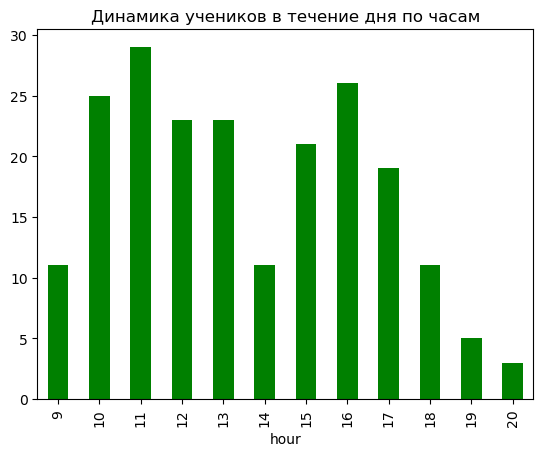

In [18]:
# для удобства финального анализа визуализирую полученные данные чтобы было видно динамику в течение дня

group_hour = group_hour.sort_values(by = 'hour')
group_hour.plot(kind='bar', stacked=False, color=['green'], legend=False, title='Динамика учеников в течение дня по часам')

**Вывод 2.2:** Более интересные данные в таблице по часам. Видно, что время, на которое чаще приходят это 11 (29), 16 (26), 10 (25), 12 (23) и 13 (23) часов по МСК. Наименьшее количество у 19 (5) и 20 (3) часов МСК. Также можно сделать вывод, что ученики чаще появляются на уроках в интервале 10-17 часов МСК. 

С активностью учеников разобрались. Теперь перехожу к анализу кто, как и. когда совершает покупку. 

##### 2.3 Кто чаще всего покупает уроки

In [19]:
# группирую всех учеников по полу и классу

group_sex_grade = df.groupby(['sex', 'grade'], as_index=False).agg({'student_id':'count'})
group_sex_grade = group_sex_grade.rename(columns={'student_id':'total_students'})
group_sex_grade

,sex,grade,total_students
0,f,1,31
1,f,2,24
2,f,3,26
3,f,4,23
4,m,1,37
5,m,2,23
6,m,3,26
7,m,4,17


In [20]:
# создаю таблицу только с купившими учениками

purchased = df[df.purchase == 1]
purchased.head()

,student_id,name,date_time,sex,grade,purchase,date,hour
1,1861986,Алеся,2022-10-29 12:00:00,f,3,1,2022-10-29,12
2,1414068,Ксения,2022-10-29 14:00:00,f,3,1,2022-10-29,14
3,1861120,Андрей,2022-10-29 15:00:00,m,3,1,2022-10-29,15
10,1878288,Анна,2022-10-31 13:00:00,f,2,1,2022-10-31,13
12,1684239,Лавр,2022-11-01 13:00:00,m,3,1,2022-11-01,13


In [21]:
# группирую только купивших учеников по полу и классу

group_sex_grade_purchased = purchased.groupby(['sex', 'grade'], as_index=False).agg({'student_id':'count'})
group_sex_grade_purchased = group_sex_grade_purchased.rename(columns={'student_id':'purchased'})
group_sex_grade_purchased

,sex,grade,purchased
0,f,1,4
1,f,2,7
2,f,3,11
3,f,4,10
4,m,1,6
5,m,2,5
6,m,3,10
7,m,4,6


In [22]:
# создаю таблицу с процентным соотношением покупок по полу и классу

percentege_purchased = group_sex_grade.merge(group_sex_grade_purchased, how='left')
percentege_purchased['percentege_purchased'] = round(percentege_purchased['purchased'] / percentege_purchased['total_students'] * 100)
percentege_purchased.sort_values(by = 'percentege_purchased', ascending=False)

,sex,grade,total_students,purchased,percentege_purchased
3,f,4,23,10,43.0
2,f,3,26,11,42.0
6,m,3,26,10,38.0
7,m,4,17,6,35.0
1,f,2,24,7,29.0
5,m,2,23,5,22.0
4,m,1,37,6,16.0
0,f,1,31,4,13.0


In [23]:
# для удобства финального анализа визуализирую полученные данные с помощью pivot table

percentege_purchased_pivot = percentege_purchased.pivot(index='grade', columns='sex', values='percentege_purchased')
percentege_purchased_pivot

sex,f,m
grade,,
1,13.0,16.0
2,29.0,22.0
3,42.0,38.0
4,43.0,35.0


<AxesSubplot:title={'center':'Соотношение учеников и покупок в процентах'}, xlabel='grade'>

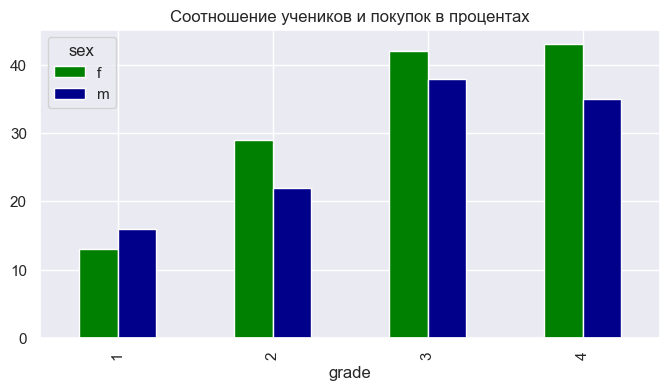

In [24]:
sns.set(rc={'figure.figsize':(8, 4)})
percentege_purchased_pivot.plot(kind='bar', stacked=False, color=['green', 'darkblue'], title='Соотношение учеников и покупок в процентах')

**Вывод 2.3:** Данные говорят, что чаще всего у меня покупали девочки 4 (43%), 3 (42%) класс и мальчики 3 (38%), 4 (35%) класс. Самые тяжелые для меня клиенты в продажах это мальчики 1 (16%) класс и девочки 1 (13%) класс. Я лучше всего провожу урок и продаю с детьми старшего возраста 4 и 3 класс, преимущественно с девочками.

##### 2.4 В какой день и час чаще всего покупают уроки

In [25]:
df['day'] = df['date'].dt.day_name()
df

,student_id,name,date_time,sex,grade,purchase,date,hour,day
0,1881297,Яков,2022-10-29 11:00:00,m,1,0,2022-10-29,11,Saturday
1,1861986,Алеся,2022-10-29 12:00:00,f,3,1,2022-10-29,12,Saturday
2,1414068,Ксения,2022-10-29 14:00:00,f,3,1,2022-10-29,14,Saturday
3,1861120,Андрей,2022-10-29 15:00:00,m,3,1,2022-10-29,15,Saturday
4,1883480,Эльвира,2022-10-30 10:00:00,f,3,0,2022-10-30,10,Sunday
...,...,...,...,...,...,...,...,...,...
202,1964997,Тимофей,2023-01-29 10:00:00,m,1,0,2023-01-29,10,Sunday
203,1964809,Азалия,2023-01-29 12:00:00,f,3,1,2023-01-29,12,Sunday
204,1967872,Федор,2023-01-30 12:00:00,m,4,0,2023-01-30,12,Monday
205,1970371,Марьям,2023-01-31 10:00:00,f,3,0,2023-01-31,10,Tuesday


In [26]:
# группирую всех учеников по дням и часам

group_day_hour = df.groupby(['day', 'hour'], as_index=False).agg({'student_id':'count'})
group_day_hour = group_day_hour.rename(columns={'student_id':'total_students'})
group_day_hour

,day,hour,total_students
0,Friday,9,2
1,Friday,10,2
2,Friday,11,5
3,Friday,12,2
4,Friday,13,4
...,...,...,...
67,Wednesday,16,4
68,Wednesday,17,3
69,Wednesday,18,3
70,Wednesday,19,1


In [27]:
### дублирую таблицу с только купившими учениками, чтобы потом не потерять

purchased = df[df.purchase == 1]
purchased.head()

,student_id,name,date_time,sex,grade,purchase,date,hour,day
1,1861986,Алеся,2022-10-29 12:00:00,f,3,1,2022-10-29,12,Saturday
2,1414068,Ксения,2022-10-29 14:00:00,f,3,1,2022-10-29,14,Saturday
3,1861120,Андрей,2022-10-29 15:00:00,m,3,1,2022-10-29,15,Saturday
10,1878288,Анна,2022-10-31 13:00:00,f,2,1,2022-10-31,13,Monday
12,1684239,Лавр,2022-11-01 13:00:00,m,3,1,2022-11-01,13,Tuesday


In [28]:
# группирую только купивших учеников по дням и часам

group_day_hour_purchased = purchased.groupby(['day', 'hour'], as_index=False).agg({'student_id':'count'})
group_day_hour_purchased = group_day_hour_purchased.rename(columns={'student_id':'purchased'})
group_day_hour_purchased.head()

,day,hour,purchased
0,Friday,10,1
1,Friday,11,2
2,Friday,13,1
3,Friday,14,2
4,Friday,16,1


In [29]:
# добавляю столбец с процентным соотношением покупок от общего числа уроков

percentege_purchased = group_day_hour.merge(group_day_hour_purchased, how='left')
percentege_purchased['percentege_purchased'] = round(percentege_purchased['purchased'] / percentege_purchased['total_students'] * 100)
percentege_purchased.sort_values(by = 'total_students', ascending=False)

,day,hour,total_students,purchased,percentege_purchased
21,Saturday,11,7,2.0,29.0
44,Thursday,15,7,1.0,14.0
16,Monday,16,6,2.0,33.0
46,Thursday,17,5,2.0,40.0
62,Wednesday,11,5,1.0,20.0
...,...,...,...,...,...
30,Sunday,11,1,NaN,NaN
32,Sunday,13,1,NaN,NaN
33,Sunday,14,1,NaN,NaN
35,Sunday,16,1,NaN,NaN


In [30]:
# для корректности отображения заполняю пустые значения нулями

percentege_purchased.percentege_purchased.fillna(0)

0      0.0
1     50.0
2     40.0
3      0.0
4     25.0
      ... 
67    75.0
68    33.0
69    33.0
70     0.0
71     0.0
Name: percentege_purchased, Length: 72, dtype: float64

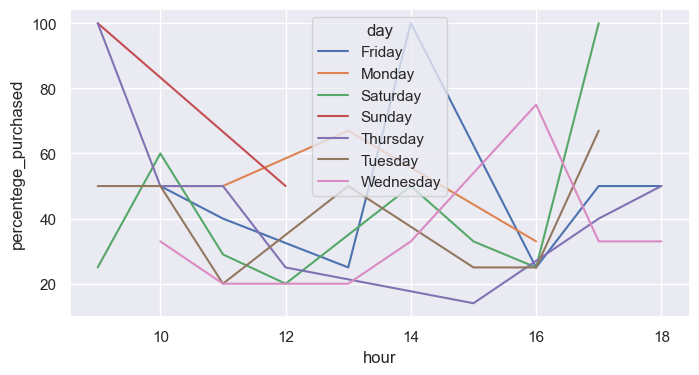

In [34]:
# визуализирую процент покупок по часам и дням

sns.lineplot(x="hour", y="percentege_purchased", hue="day", data=percentege_purchased)
sns.set(rc={'figure.figsize':(16, 5)})

Получив такого вида данные, я понимаю, что где 1 ученик и 1 покупка, будет 100% конверсия, а значит мы не можем доверять такой метрике (у нас слишком мало данных). Чтобы избежать этого парадокса, я вывожу другую метрику - multiplication_metric: умножаю количество уроков на количество покупок. 

In [32]:
percentege_purchased['multiplication_metric'] = percentege_purchased['purchased'] * percentege_purchased['total_students']
percentege_purchased.sort_values(by = 'total_students', ascending=False)

,day,hour,total_students,purchased,percentege_purchased,multiplication_metric
21,Saturday,11,7,2.0,29.0,14.0
44,Thursday,15,7,1.0,14.0,7.0
16,Monday,16,6,2.0,33.0,12.0
46,Thursday,17,5,2.0,40.0,10.0
62,Wednesday,11,5,1.0,20.0,5.0
...,...,...,...,...,...,...
30,Sunday,11,1,NaN,NaN,NaN
32,Sunday,13,1,NaN,NaN,NaN
33,Sunday,14,1,NaN,NaN,NaN
35,Sunday,16,1,NaN,NaN,NaN


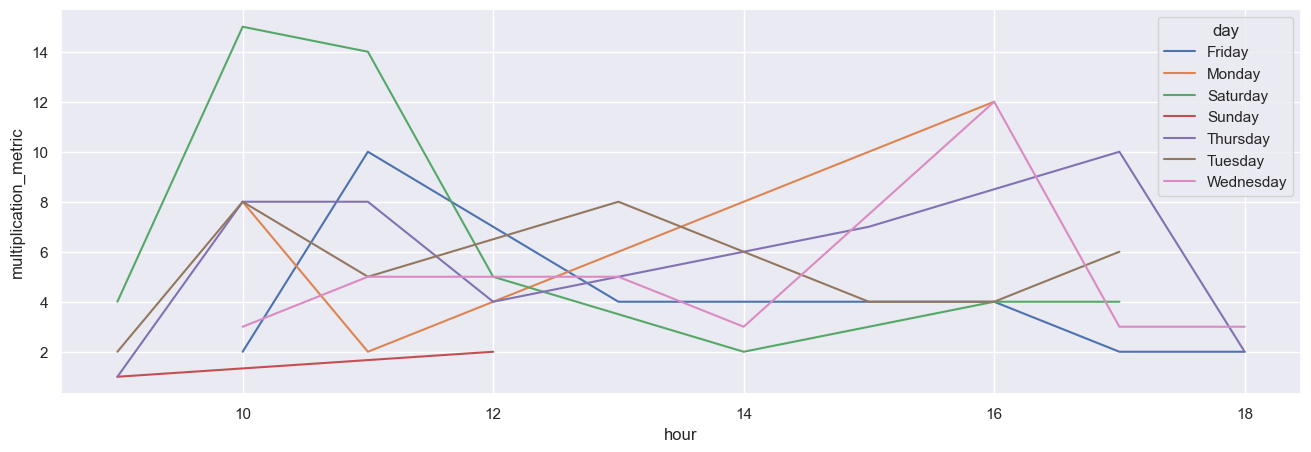

In [33]:
# визуализирую полученную метрику

sns.lineplot(x="hour", y="multiplication_metric", hue="day", data=percentege_purchased)
sns.set(rc={'figure.figsize':(16, 5)})

С метрикой умножения я получаю данные, которые более достоверно показывают, какие дни и часы наиболее были успешными. 

**Вывод 2.4:** Использовав multiplication_metric я получил lineplot, на основе которого видно:
* Лучшие показатели продаж приходятся на 
    - Понедельник 16 часов
    - Среда 16 часов
    - Суббота 10, 11 часов
* Худшие показатели продаж приходятся на 
    - Четверг 9 часов
    - Воскресенье 9, 10, 11, 12 часов
    
Также можно заметить, что линия Воскрессенья обрывается на 12 часах, это означает, что не было ни одной продажи в Воскресенье после полудня. На основании этого можно сдлеать вывод, что в воскресенье после обеда хуже всего покупают уроки. Лушче всего в Субботу до обеда и Понедельник и Среда в 16 часов. 
    


## Заключение

Как вы могли заметить, во всех выводах я намеренно указываюя на себя. Изложенная выше статистика и выводы не могут распространяться на всю школу, т.к. основываются на данных только 1 учителя (моих). Моя задача была показать мои навыки от базовых (сбор данных) до профессиональных (визуализация, поиск инсайтов).